In [6]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"D:\Unified Mentor Intership\Data Science projects\Climate Change Modeling\Data\climate_change_dataset.csv")
df.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


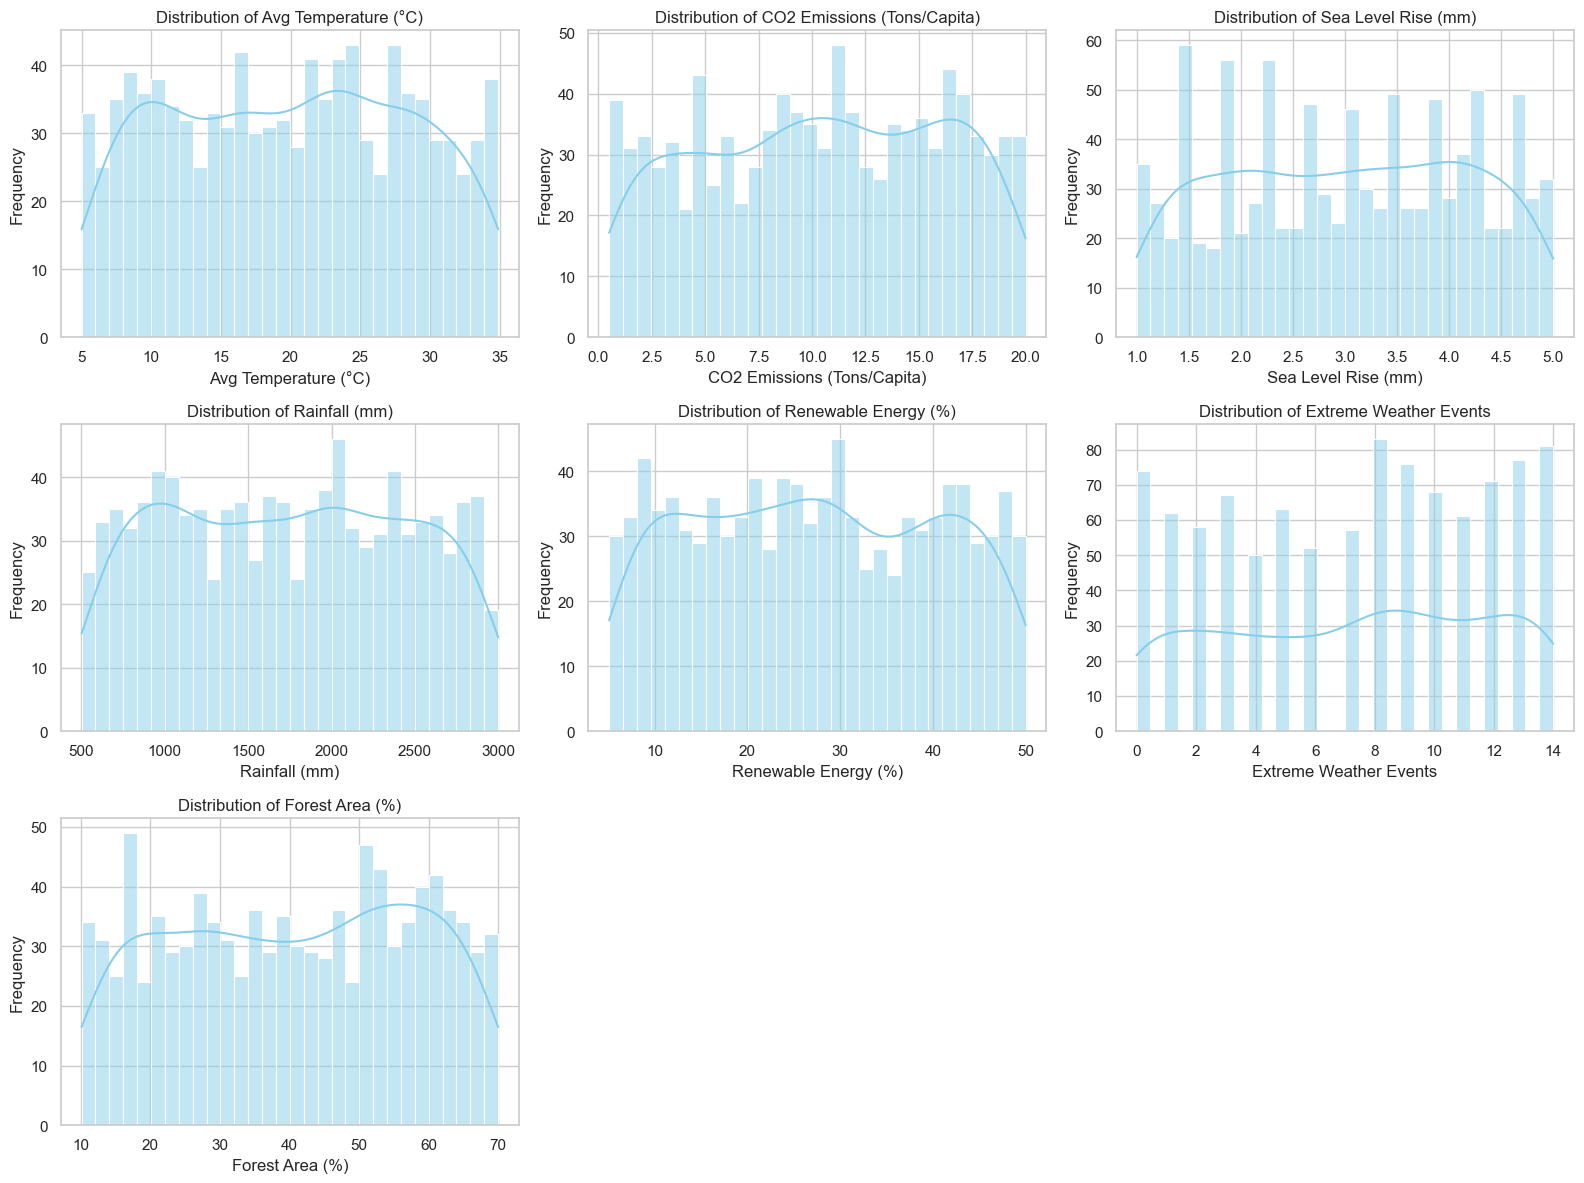

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot Style
sns.set(style="whitegrid")
plt.figure(figsize=(16,12))



# List of Numeric Features
features = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 
            'Sea Level Rise (mm)', 'Rainfall (mm)', 
            'Renewable Energy (%)', 'Extreme Weather Events', 
            'Forest Area (%)']


# Plot each as histogram
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Correlation Heatmap

In [8]:
correlation_matrix = df.select_dtypes(include='number').corr()


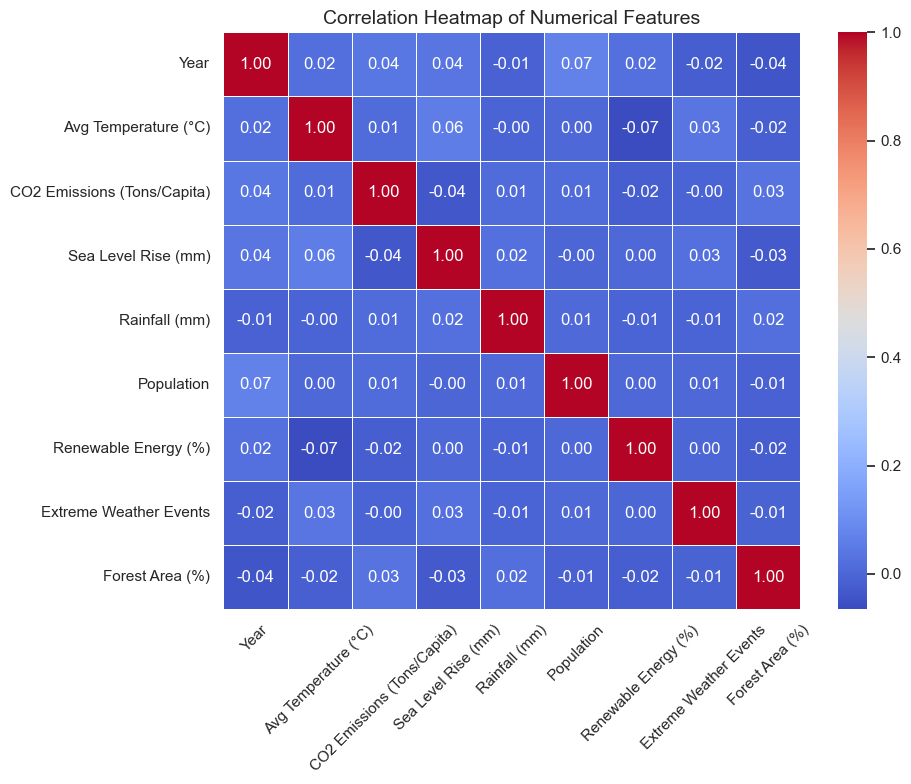

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Trend Over Years (Line Plots)

In [10]:
# Group by year and calculate mean values
yearly_data = df.groupby('Year').mean(numeric_only=True).reset_index()


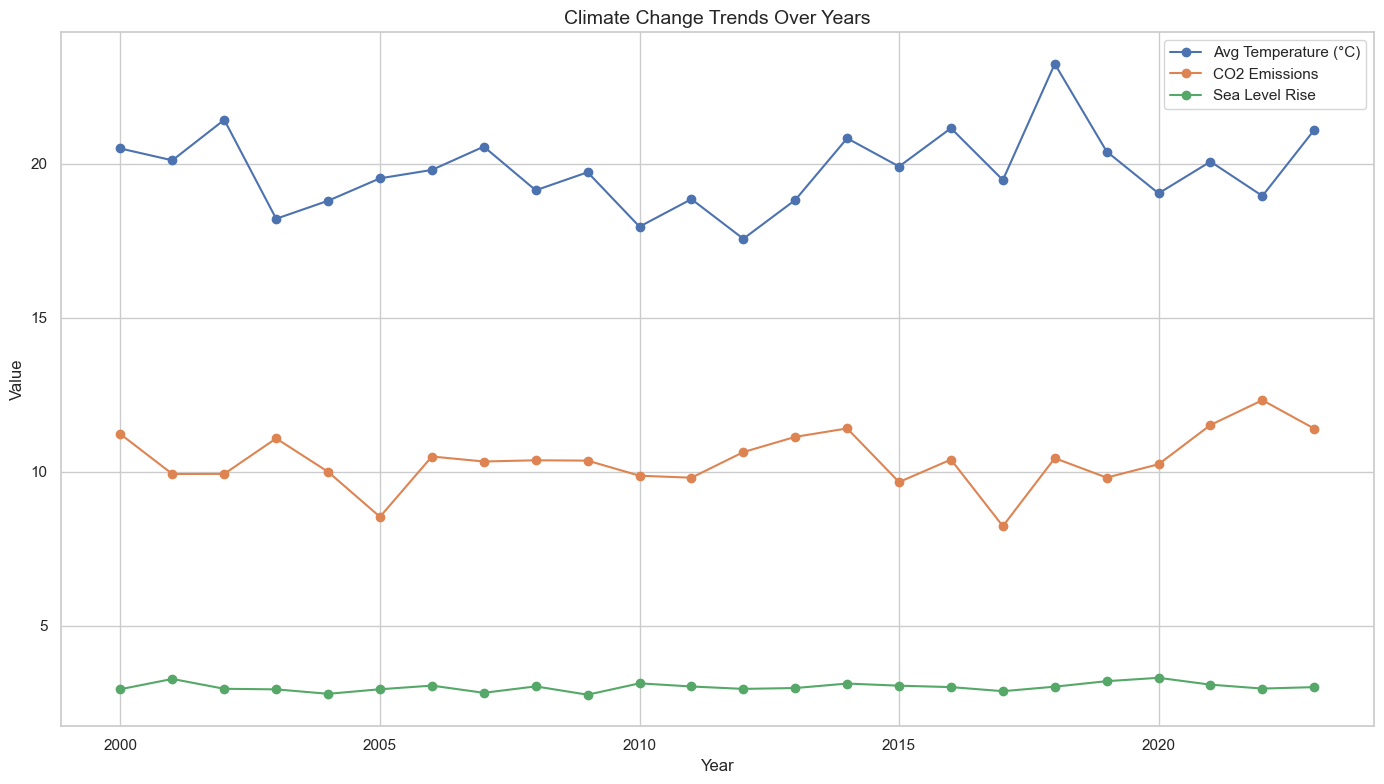

In [18]:
# Plot trends for key features
plt.figure(figsize=(14, 8))

# Temperature trend
plt.plot(yearly_data['Year'], yearly_data['Avg Temperature (°C)'], label='Avg Temperature (°C)', marker='o')

# CO2 Emissions
plt.plot(yearly_data['Year'], yearly_data['CO2 Emissions (Tons/Capita)'], label='CO2 Emissions', marker='o')

# Sea Level
plt.plot(yearly_data['Year'], yearly_data['Sea Level Rise (mm)'], label='Sea Level Rise', marker='o')

plt.title('Climate Change Trends Over Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Country-wise Comparison (Box/Bar Plots)

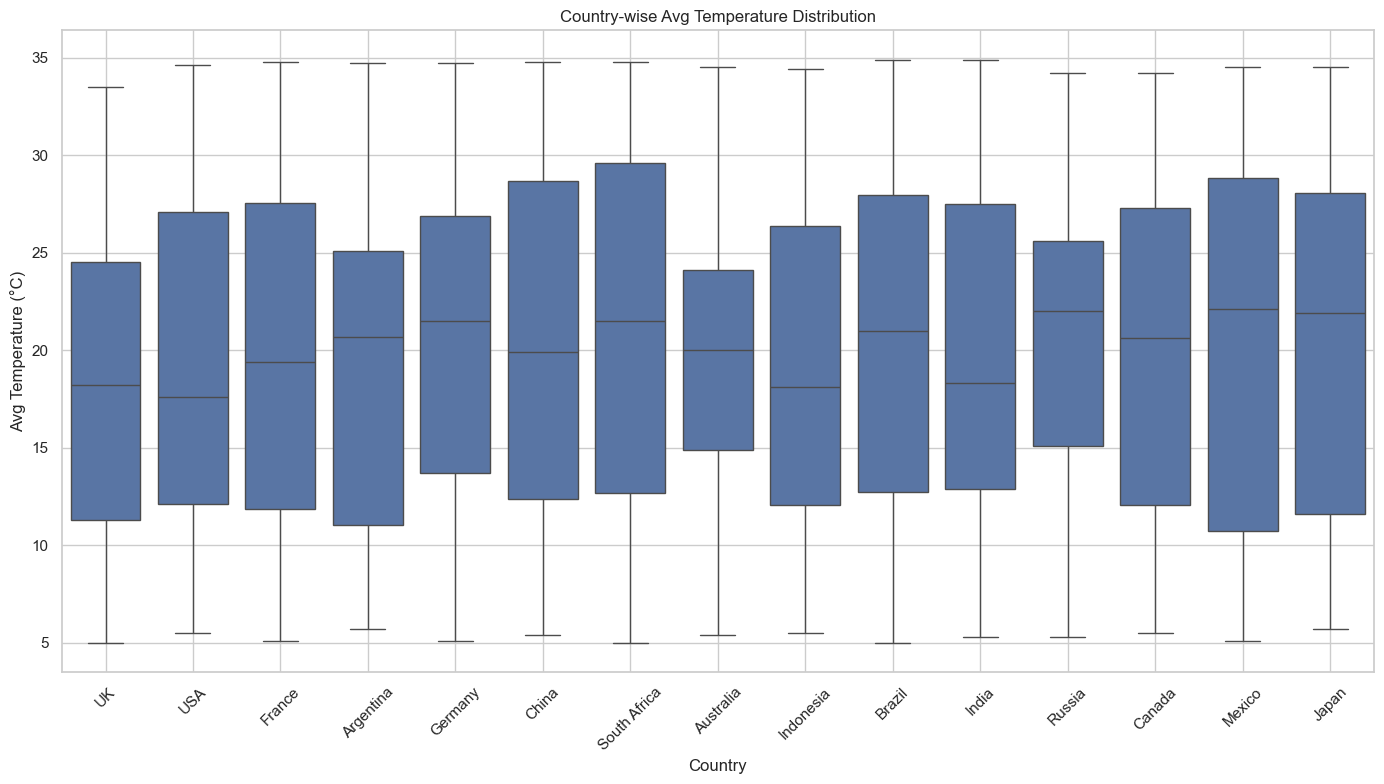

In [19]:
# Set plot size
plt.figure(figsize=(14, 8))

# Average Temperature by Country (Boxplot)
sns.boxplot(x='Country', y='Avg Temperature (°C)', data=df)
plt.title('Country-wise Avg Temperature Distribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Bar Plot (mean temp by country)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10704\4081843746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_avg_temp.index, y=country_avg_temp.values, palette="coolwarm")


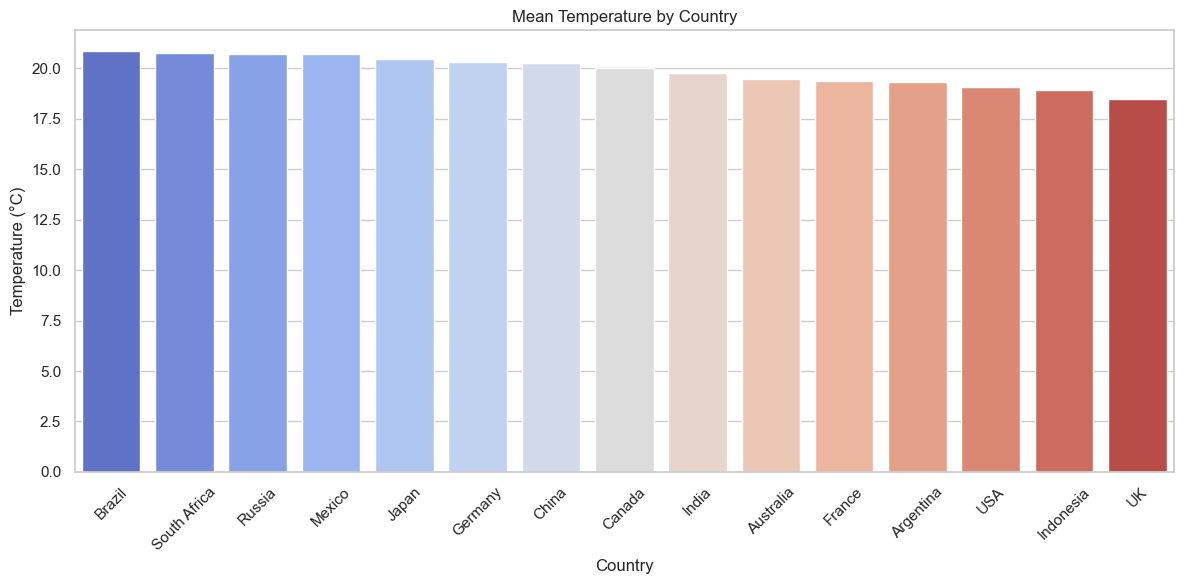

In [20]:
plt.figure(figsize=(12, 6))
country_avg_temp = df.groupby('Country')['Avg Temperature (°C)'].mean().sort_values(ascending=False)

sns.barplot(x=country_avg_temp.index, y=country_avg_temp.values, palette="coolwarm")
plt.title('Mean Temperature by Country')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
